In [187]:
import pandas as pd
import matplotlib.pyplot as plt

## Fine-Tuning LLaVA on the RMET

We are looking at our results of fine-tuning the LLaVA model on the RMET task. We are looking at 5 different versions of the models: the base model and 4 fine-tuned models with different levels of training. 

### 1 RMET data

#### 1.1 Loading and checking the data

In [255]:
local_base1 = pd.read_csv('rmet_results/rmet_local_base-1.txt')
local_base2 = pd.read_csv('rmet_results/rmet_local_base-2.txt')
local_base3 = pd.read_csv('rmet_results/rmet_local_base-3.txt')

HPC_base1 = pd.read_csv('rmet_results/rmet_HPC_base-1.txt')
HPC_base2 = pd.read_csv('rmet_results/rmet_HPC_base-2.txt')
HPC_base3 = pd.read_csv('rmet_results/rmet_HPC_base-3.txt')
HPC_base4 = pd.read_csv('rmet_results/rmet_HPC_base-4.txt')
HPC_base5 = pd.read_csv('rmet_results/rmet_HPC_base-5.txt')


ep1_1 = pd.read_csv('rmet_results/rmet_1ep-1.txt')
ep1_2 = pd.read_csv('rmet_results/rmet_1ep-2.txt')
ep1_3 = pd.read_csv('rmet_results/rmet_1ep-3.txt')
ep1_4 = pd.read_csv('rmet_results/rmet_1ep-4.txt')
ep1_5 = pd.read_csv('rmet_results/rmet_1ep-5.txt')

ep5_1 = pd.read_csv('rmet_results/rmet_5ep-1.txt')
ep5_2 = pd.read_csv('rmet_results/rmet_5ep-2.txt')
ep5_3 = pd.read_csv('rmet_results/rmet_5ep-3.txt')
ep5_4 = pd.read_csv('rmet_results/rmet_5ep-4.txt')
ep5_5 = pd.read_csv('rmet_results/rmet_5ep-5.txt')

ep7_1 = pd.read_csv('rmet_results/rmet_7ep-1.txt')
ep7_2 = pd.read_csv('rmet_results/rmet_7ep-2.txt')
ep7_3 = pd.read_csv('rmet_results/rmet_7ep-3.txt')
ep7_4 = pd.read_csv('rmet_results/rmet_7ep-4.txt')
ep7_5 = pd.read_csv('rmet_results/rmet_7ep-5.txt')

ep10_1 = pd.read_csv('rmet_results/rmet_10ep-1.txt')
ep10_2 = pd.read_csv('rmet_results/rmet_10ep-2.txt')
ep10_3 = pd.read_csv('rmet_results/rmet_10ep-3.txt')

In [256]:
rmet = pd.concat([local_base1, local_base2, local_base3,
                  HPC_base1, HPC_base2, HPC_base3, HPC_base4, HPC_base5,
                  ep1_1, ep1_2, ep1_3, ep1_4, ep1_5, 
                  ep5_1, ep5_2, ep5_3, ep5_4, ep5_5, 
                  ep7_1, ep7_2, ep7_3, ep7_4, ep7_5,
                  ep10_1, ep10_2, ep10_3], axis=1)

### 2 Task performance


#### 2.1 Load answers

In [257]:
answers_file = 'rmet_materials/answers.txt'
with open(answers_file, 'r') as file:
    answers = [line.strip() for line in file.readlines()]

In [258]:
answers[:10]

['playful',
 'upset',
 'desire',
 'insisting',
 'worried',
 'fantasizing',
 'uneasy',
 'despondent',
 'preoccupied',
 'cautious']

#### 2.2 Check responses

In [259]:
performance = rmet.copy()

In [260]:
for model in performance.columns:
    performance[model] = [1 if performance[model][i] == answers[i] else 0 for i in range(len(answers))]

#### 2.3 Calculate number correct

In [261]:
num_correct = performance.sum(axis=0)

In [262]:
num_correct

llava_local_base-1    17
llava_local_base-2    17
llava_local_base-3    17
llava_HPC_base-1      20
llava_HPC_base-2      20
llava_HPC_base-3      20
llava_HPC_base-4      20
llava_HPC_base-5      19
llava_1ep-1           22
llava_1ep-2           20
llava_1ep-3           21
llava_1ep-4           21
llava_1ep-5           21
llava_5ep-1           20
llava_5ep-2           23
llava_5ep-3           21
llava_5ep-4           22
llava_5ep-5           21
llava_7ep-1           22
llava_7ep-2           20
llava_7ep-3           22
llava_7ep-4           21
llava_7ep-5           22
llava_10ep-1          22
llava_10ep-2          21
llava_10ep-3          21
dtype: int64

#### 2.4 Calculate Performance Increase (from base model)

In [263]:
increase_performance = pd.DataFrame(num_correct)
increase_performance.columns = ['num_correct']

In [264]:
# Merge model types
increase_performance['model'] = [idx.split('-')[0] for idx in increase_performance.index]


In [265]:
model_performance = increase_performance.groupby('model')['num_correct'].mean()

In [266]:
model_performance = model_performance.reset_index()
model_performance.columns = ['model', 'num_correct']

In [267]:
model_performance

,model,num_correct
0,llava_10ep,21.333333
1,llava_1ep,21.000000
2,llava_5ep,21.400000
3,llava_7ep,21.400000
4,llava_HPC_base,19.800000
5,llava_local_base,17.000000


In [268]:
model_performance['percent'] = model_performance['num_correct'].apply(lambda x: x / 36)
model_performance['improvement'] = model_performance['percent'].apply(lambda x: x - model_performance.iloc[5, 2])

In [269]:
model_performance

,model,num_correct,percent,improvement
0,llava_10ep,21.333333,0.592593,0.120370
1,llava_1ep,21.000000,0.583333,0.111111
2,llava_5ep,21.400000,0.594444,0.122222
3,llava_7ep,21.400000,0.594444,0.122222
4,llava_HPC_base,19.800000,0.550000,0.077778
5,llava_local_base,17.000000,0.472222,0.000000


In [270]:
num_correct.index = pd.MultiIndex.from_tuples([(i.split('-')[0], int(i.split('-')[1])) for i in num_correct.index])
num_correct

llava_local_base  1    17
                  2    17
                  3    17
llava_HPC_base    1    20
                  2    20
                  3    20
                  4    20
                  5    19
llava_1ep         1    22
                  2    20
                  3    21
                  4    21
                  5    21
llava_5ep         1    20
                  2    23
                  3    21
                  4    22
                  5    21
llava_7ep         1    22
                  2    20
                  3    22
                  4    21
                  5    22
llava_10ep        1    22
                  2    21
                  3    21
dtype: int64

In [271]:
data = num_correct.unstack().transpose()
data

,llava_10ep,llava_1ep,llava_5ep,llava_7ep,llava_HPC_base,llava_local_base
1,22.0,22.0,20.0,22.0,20.0,17.0
2,21.0,20.0,23.0,20.0,20.0,17.0
3,21.0,21.0,21.0,22.0,20.0,17.0
4,NaN,21.0,22.0,21.0,20.0,NaN
5,NaN,21.0,21.0,22.0,19.0,NaN


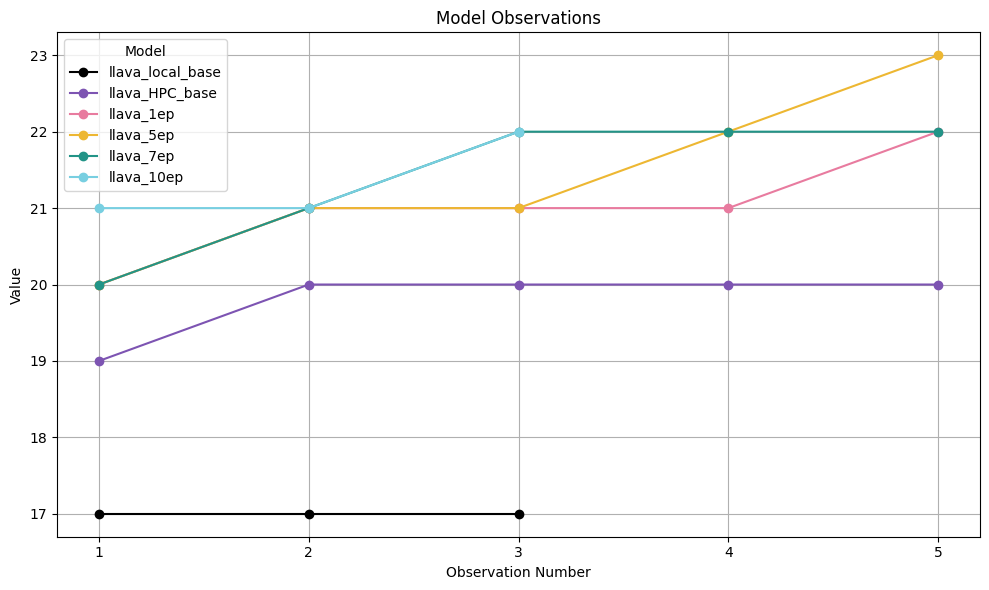

In [272]:
# Line colors
line_colors = {
    'llava_local_base': 'black',
    'llava_HPC_base': '#7d54b2',
    'llava_1ep': '#e87b9f',
    'llava_5ep': '#edb732',
    'llava_7ep': '#229487',
    'llava_10ep': '#78cfe1'
}
# Plotting
plt.figure(figsize=(10, 6))

for model, color in line_colors.items():
    plt.plot(data.index, data[model].sort_values(), label=model, marker='o', color=color)  # Using 'o' marker for observation points

plt.title('Model Observations')
plt.xlabel('Observation Number')
plt.ylabel('Value')
plt.legend(title='Model')
plt.grid(True)
plt.xticks(range(1, data.index.max() + 1))  # Ensure x-axis ticks cover all observation numbers
plt.tight_layout()
plt.show()